# Plot Utilizations with PyVista

In [7]:
job_id = "_00000000001"
job_data_file_path = "../outputs/" + job_id + "_data.json"

In [8]:
import json
from sigmaepsilon.deepdict import DeepDict, asciiprint

with open(job_data_file_path, "r") as json_file:
    job_data = json.load(json_file)
job_data : DeepDict = DeepDict.wrap(job_data)
job_data.lock()
asciiprint(job_data)

DeepDict
 +-- _meta
 +-- load
 +-- geometry
 +-- material
 +-- calculation
 |   +-- azure
 |       +-- storage
 +-- output


In [9]:
import os
import pyvista as pv
from sigmaepsilon.mesh import PointData

job_id = job_data["_meta","job_id"]

notebook_dir = os.getcwd()
file_name = os.path.join(notebook_dir, job_id)
util_parquet_file_name = file_name + "_res3d" + ".parquet"
pd = PointData.from_parquet(util_parquet_file_name)

point_cloud = pv.PolyData(pd.x)
point_cloud["scalars"] = pd["util"].to_numpy()

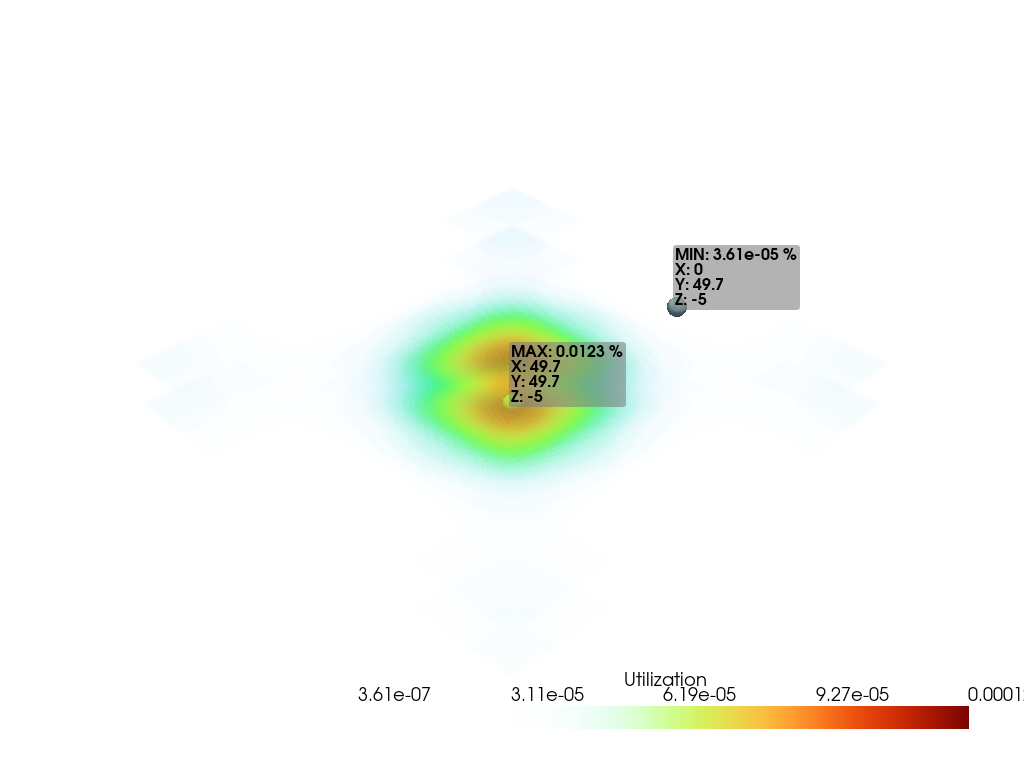

In [10]:
from sigmaepsilon.core.formatting import floatformatter
import numpy as np

formatter = floatformatter(sig=3)  # to format strings to 3 significant digits

plotter = pv.Plotter(notebook=True)

scalars = pd["util"].to_numpy()
points = pd.x
max_index = np.argmax(scalars)
min_index = np.argmin(scalars)

p_min = point_cloud.points[min_index]
p_max = point_cloud.points[max_index]
label_coords = np.array([p_min, p_max])

labels = [
    (
        f"MIN: {formatter.format(scalars.min()*100)} %"
        f"\nX: {formatter.format(points[min_index, 0])}"
        f"\nY: {formatter.format(points[min_index, 1])}"
        f"\nZ: {formatter.format(points[min_index, 2])}"
    ),
    (
        f"MAX: {formatter.format(scalars.max()*100)} %"
        f"\nX: {formatter.format(points[max_index, 0])}"
        f"\nY: {formatter.format(points[max_index, 1])}"
        f"\nZ: {formatter.format(points[max_index, 2])}"
    ),
]

plotter.add_mesh(
    point_cloud,
    scalars="scalars",
    cmap="turbo",
    lighting=False,
    scalar_bar_args={"title": "Utilization"},
    render_points_as_spheres=True,
    opacity="sigmoid",
)

plotter.add_point_labels(
    label_coords,
    labels,
    point_size=20,
    font_size=16,
    always_visible=True,
    shape_color="grey",
    shape_opacity=0.6,
    render_points_as_spheres=True,
)

#plotter.show(jupyter_backend="trame")
plotter.show(jupyter_backend="static")